# Data Science and Business Analytics (GRIP JULY21) Task 2:


## Exploratory Data Analysis - Retail

> Perform Exploratory Data Analysis on dataset 'SampleSuperstore'.

> As a Business Manager, try to find out the weak areas where you can work to make more profit.

> What all business problems you can derive by exploring the data?


### AUTHOR: Adika Malviya


In [1]:
# importing required libraries
library(ggplot2);
library(dplyr);

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# getting data
getwd();
setwd('/Users/adikamalviya/Desktop/SPARKS/Task2');
getwd();
raw_data=read.csv("SampleSuperstore.csv")
head(raw_data)

[1] "/Users/adikamalviya/Desktop/SPARKS/Task2"

[1] "/Users/adikamalviya/Desktop/SPARKS/Task2"

Ship.Mode,Segment,Country,City,State,Postal.Code,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


## Basic Data Exploration

In [3]:
# Structure of Data Frame
str(raw_data)

'data.frame':	9994 obs. of  13 variables:
 $ Ship.Mode   : Factor w/ 4 levels "First Class",..: 3 3 3 4 4 4 4 4 4 4 ...
 $ Segment     : Factor w/ 3 levels "Consumer","Corporate",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ Country     : Factor w/ 1 level "United States": 1 1 1 1 1 1 1 1 1 1 ...
 $ City        : Factor w/ 531 levels "Aberdeen","Abilene",..: 195 195 267 154 154 267 267 267 267 267 ...
 $ State       : Factor w/ 49 levels "Alabama","Arizona",..: 16 16 4 9 9 4 4 4 4 4 ...
 $ Postal.Code : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $ Region      : Factor w/ 4 levels "Central","East",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ Category    : Factor w/ 3 levels "Furniture","Office Supplies",..: 1 1 2 1 2 1 2 3 2 2 ...
 $ Sub.Category: Factor w/ 17 levels "Accessories",..: 5 6 11 17 15 10 3 14 4 2 ...
 $ Sales       : num  262 731.9 14.6 957.6 22.4 ...
 $ Quantity    : int  2 3 2 5 2 7 4 6 3 5 ...
 $ Discount    : num  0 0 0 0.45 0.2 0 0 0.2 0.2 0 ...
 $ Profit      : num  41.

In [4]:
# Summary statistics on the columns in data frame.
summary(raw_data)

          Ship.Mode           Segment              Country    
 First Class   :1538   Consumer   :5191   United States:9994  
 Same Day      : 543   Corporate  :3020                       
 Second Class  :1945   Home Office:1783                       
 Standard Class:5968                                          
                                                              
                                                              
                                                              
            City               State       Postal.Code        Region    
 New York City: 915   California  :2001   Min.   : 1040   Central:2323  
 Los Angeles  : 747   New York    :1128   1st Qu.:23223   East   :2848  
 Philadelphia : 537   Texas       : 985   Median :56430   South  :1620  
 San Francisco: 510   Pennsylvania: 587   Mean   :55190   West   :3203  
 Seattle      : 428   Washington  : 506   3rd Qu.:90008                 
 Houston      : 377   Illinois    : 492   Max.   :99301   

## Data Cleaning

In [5]:
# Checking for null values:
if(is.null(raw_data)=='TRUE'){
    "There are null values in this data set!"
} else{
    "There is no null value in this data set. You are good to go!"
}

[1] "There is no null value in this data set. You are good to go!"

In [6]:
# checking duplicates
# finding number of duplicated rows
sum(duplicated(raw_data))

[1] 17

In [7]:
# dropping duplicates from the dataset
data=unique(raw_data)
data

,Ship.Mode,Segment,Country,City,State,Postal.Code,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [8]:
str(data)

'data.frame':	9977 obs. of  13 variables:
 $ Ship.Mode   : Factor w/ 4 levels "First Class",..: 3 3 3 4 4 4 4 4 4 4 ...
 $ Segment     : Factor w/ 3 levels "Consumer","Corporate",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ Country     : Factor w/ 1 level "United States": 1 1 1 1 1 1 1 1 1 1 ...
 $ City        : Factor w/ 531 levels "Aberdeen","Abilene",..: 195 195 267 154 154 267 267 267 267 267 ...
 $ State       : Factor w/ 49 levels "Alabama","Arizona",..: 16 16 4 9 9 4 4 4 4 4 ...
 $ Postal.Code : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $ Region      : Factor w/ 4 levels "Central","East",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ Category    : Factor w/ 3 levels "Furniture","Office Supplies",..: 1 1 2 1 2 1 2 3 2 2 ...
 $ Sub.Category: Factor w/ 17 levels "Accessories",..: 5 6 11 17 15 10 3 14 4 2 ...
 $ Sales       : num  262 731.9 14.6 957.6 22.4 ...
 $ Quantity    : int  2 3 2 5 2 7 4 6 3 5 ...
 $ Discount    : num  0 0 0 0.45 0.2 0 0 0.2 0.2 0 ...
 $ Profit      : num  41.

In [9]:
# drop the unnecessary columns like ship mode and postal code which doesn't affect the sales and profit
data$Ship.Mode = NULL;
data$Postal.Code = NULL
str(data);

'data.frame':	9977 obs. of  11 variables:
 $ Segment     : Factor w/ 3 levels "Consumer","Corporate",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ Country     : Factor w/ 1 level "United States": 1 1 1 1 1 1 1 1 1 1 ...
 $ City        : Factor w/ 531 levels "Aberdeen","Abilene",..: 195 195 267 154 154 267 267 267 267 267 ...
 $ State       : Factor w/ 49 levels "Alabama","Arizona",..: 16 16 4 9 9 4 4 4 4 4 ...
 $ Region      : Factor w/ 4 levels "Central","East",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ Category    : Factor w/ 3 levels "Furniture","Office Supplies",..: 1 1 2 1 2 1 2 3 2 2 ...
 $ Sub.Category: Factor w/ 17 levels "Accessories",..: 5 6 11 17 15 10 3 14 4 2 ...
 $ Sales       : num  262 731.9 14.6 957.6 22.4 ...
 $ Quantity    : int  2 3 2 5 2 7 4 6 3 5 ...
 $ Discount    : num  0 0 0 0.45 0.2 0 0 0.2 0.2 0 ...
 $ Profit      : num  41.91 219.58 6.87 -383.03 2.52 ...


## Checking for Correaltion

In [10]:
cor(data[,8:11])

,Sales,Quantity,Discount,Profit
Sales,1.00000000,0.200722092,-0.028311117,0.47906731
Quantity,0.20072209,1.000000000,0.008678422,0.06621065
Discount,-0.02831112,0.008678422,1.000000000,-0.21966206
Profit,0.47906731,0.066210646,-0.219662064,1.00000000


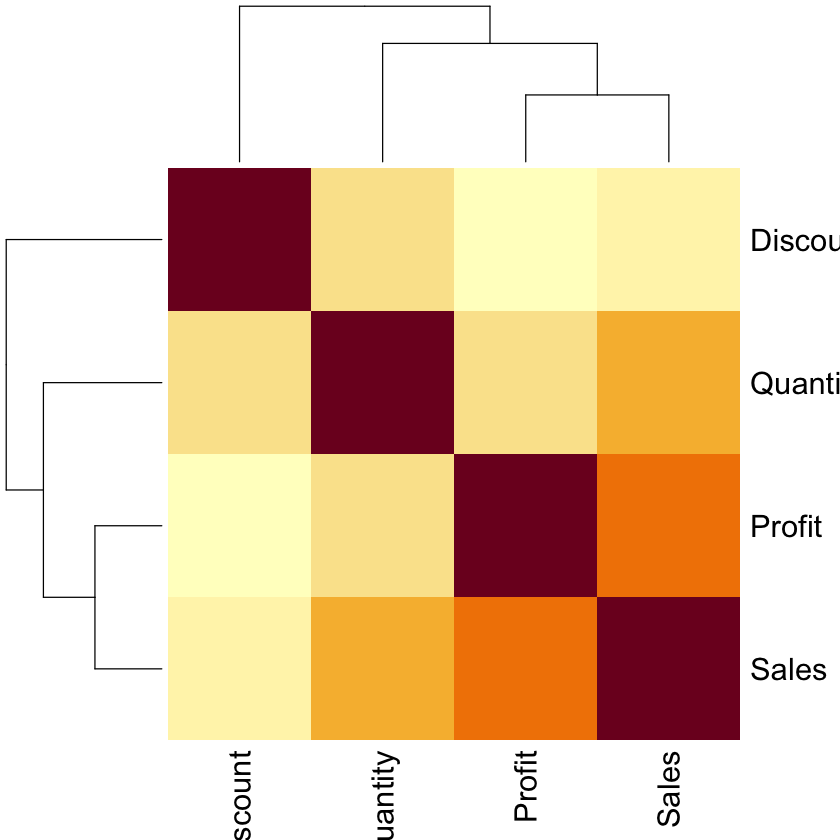

In [11]:
heatmap(x = cor(data[,8:11]), symm = TRUE)

In [12]:
head(data)

Segment,Country,City,State,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


## Data Visualization

### Finding total of Measures like profit ,Sales and Quantity

In [13]:
sprintf('Total sales : %.2f',sum(data$Sales))
sprintf('Total Quantity sold: %.2f:',sum(data$Quantity))
sprintf('Total Profit ($) %.2f:',sum(data$Profit))

[1] "Total sales : 2296195.59"

[1] "Total Quantity sold: 37820.00:"

[1] "Total Profit ($) 286241.42:"

### No of Orders with respect to Category using countplot

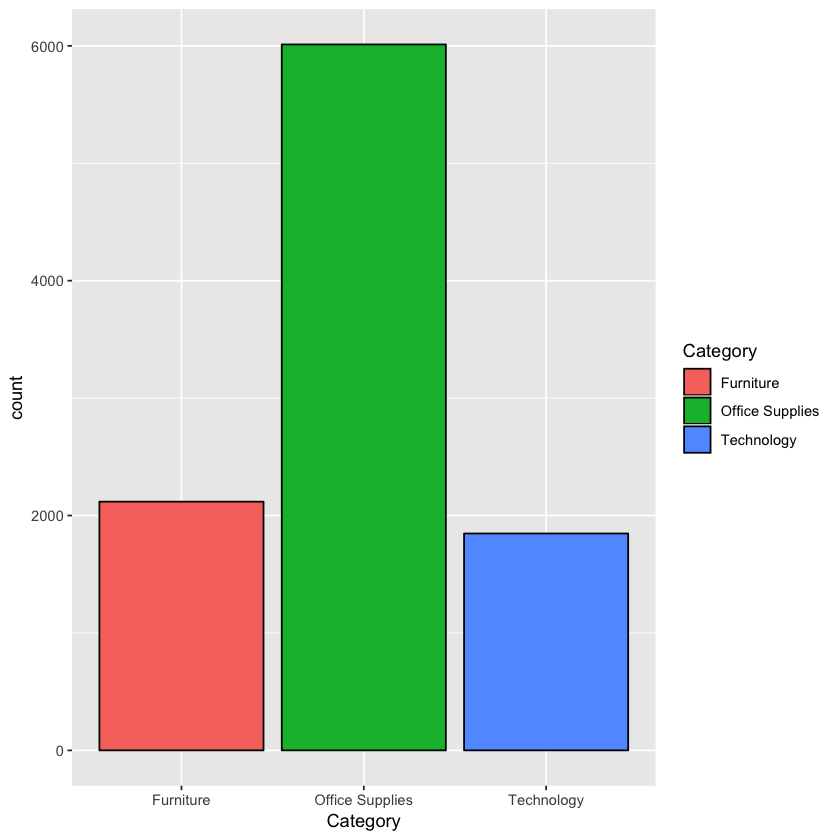

In [14]:
ggplot(data=data, aes(x=Category,fill=Category)) + geom_bar(colour="Black") 

### Insight:
- Number of orders of office supplies is largest but interesting thing to notice, that it doesn't implies that sales and profits would be most from this category. 
- Number of orders of technology is smallest but here also don't expect that it will produce least sales or profit.

We will look at both of this further.


### No of Orders with respect to Segment using countplot

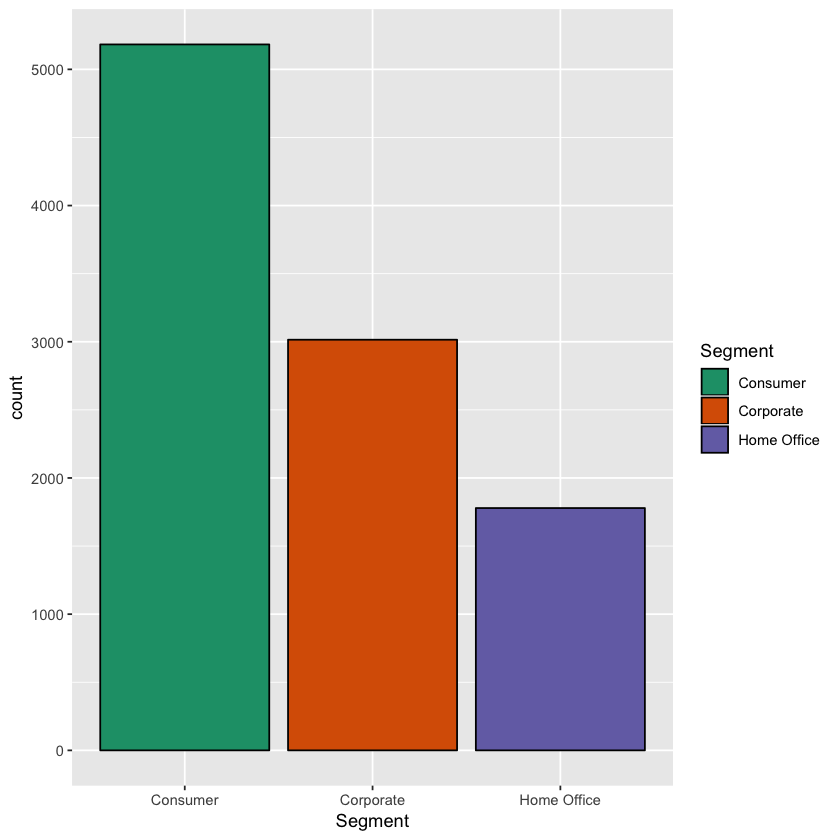

In [15]:
ggplot(data=data, aes(x=Segment,fill=Segment)) + geom_bar(colour="Black") + scale_fill_brewer(palette="Dark2")

### No of Orders with respect to Region using countplot

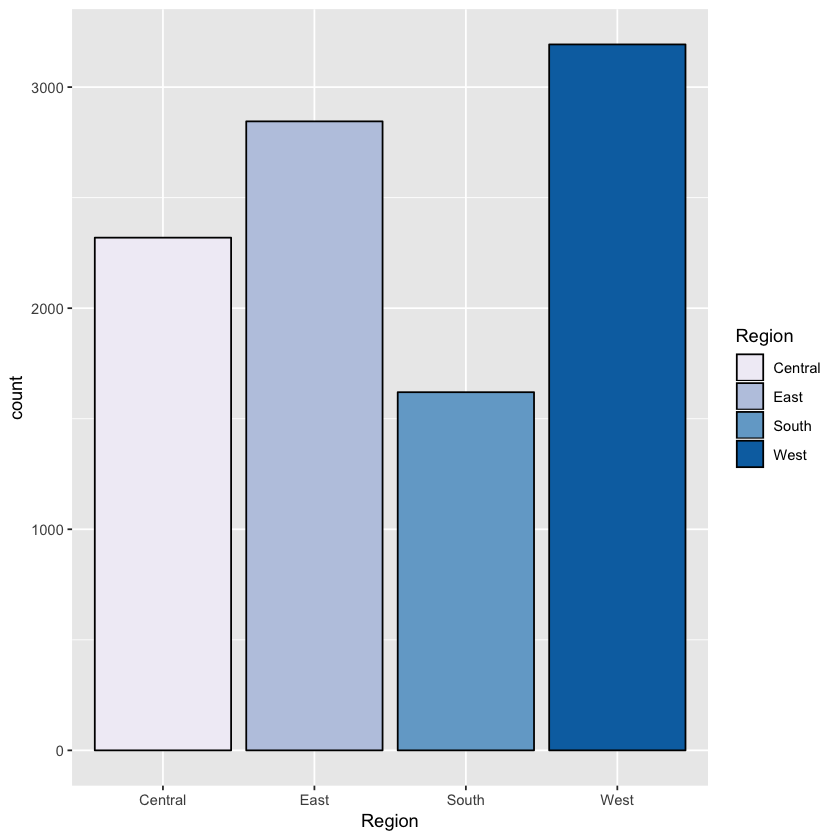

In [16]:
ggplot(data=data, aes(x=Region,fill=Region)) + geom_bar(colour="Black") + scale_fill_brewer(palette="PuBu")

### Comparison of sales in different regions

In [17]:
region_sales=aggregate(data$Sales, by=list(data$Region), FUN=mean)
salesdata = region_sales[order(region_sales$x, decreasing = TRUE),]
salesdata

,Group.1,x
3,South,241.8036
2,East,238.4658
4,West,227.1393
1,Central,215.9478


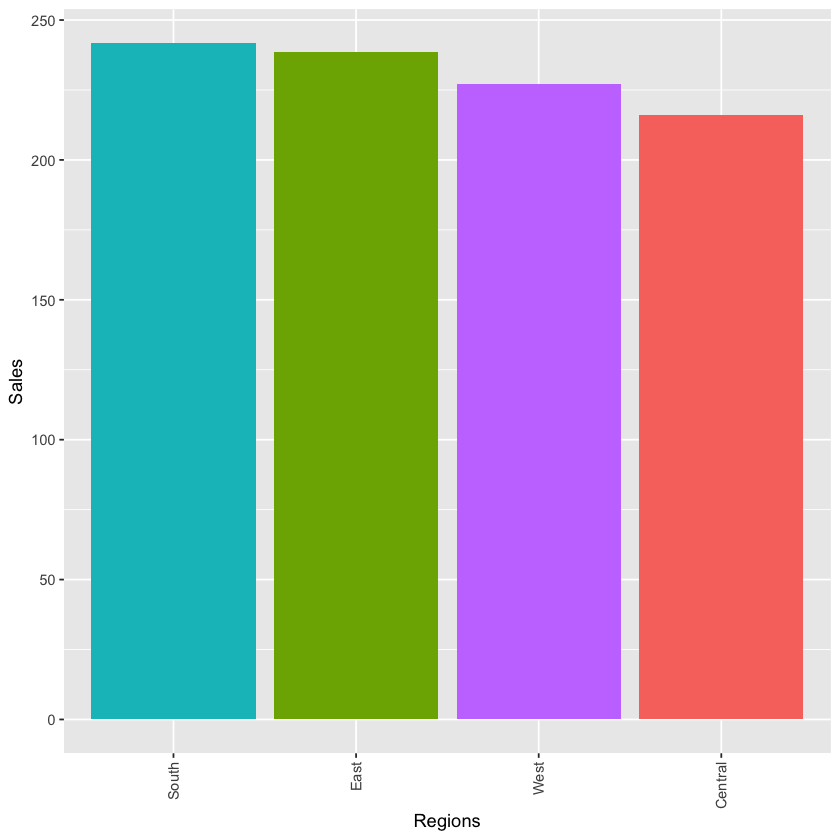

In [18]:
ggplot(salesdata,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = "none") + xlab("Regions") + ylab("Sales")

### Comparison of profit in different regions.

In [19]:
region_profit=aggregate(data$Profit, by=list(data$Region), FUN=mean)
profitdata = region_profit[order(region_profit$x, decreasing = TRUE),]
profitdata

,Group.1,x
4,West,33.92728
2,East,32.16390
3,South,28.85767
1,Central,17.10042


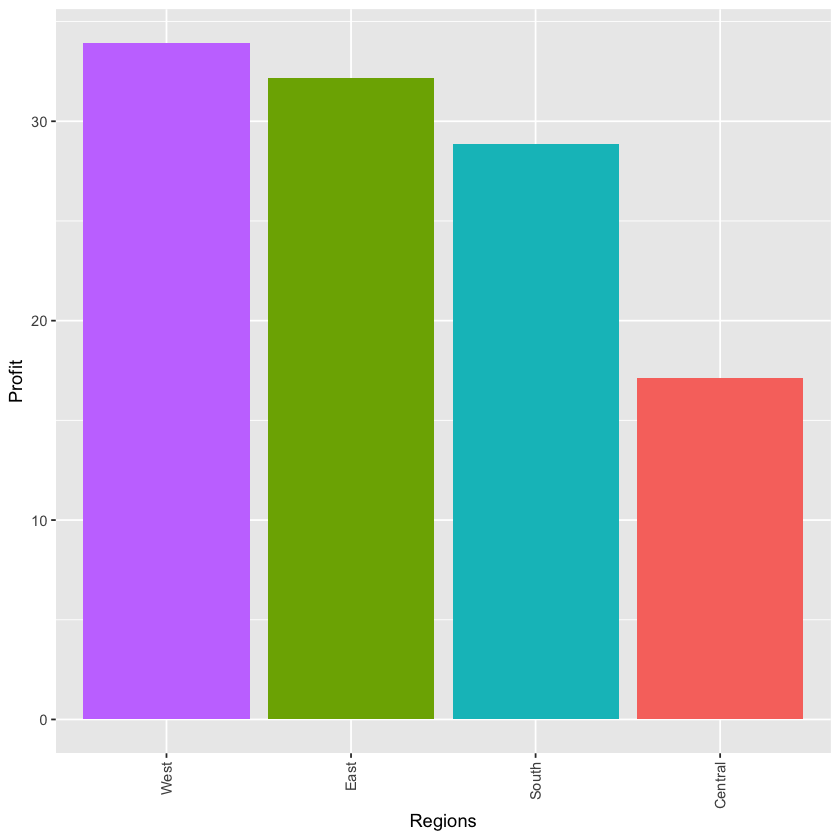

In [20]:
ggplot(profitdata,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = "none") + xlab("Regions") + ylab("Profit")

### Orders with respect to Sub - Categories

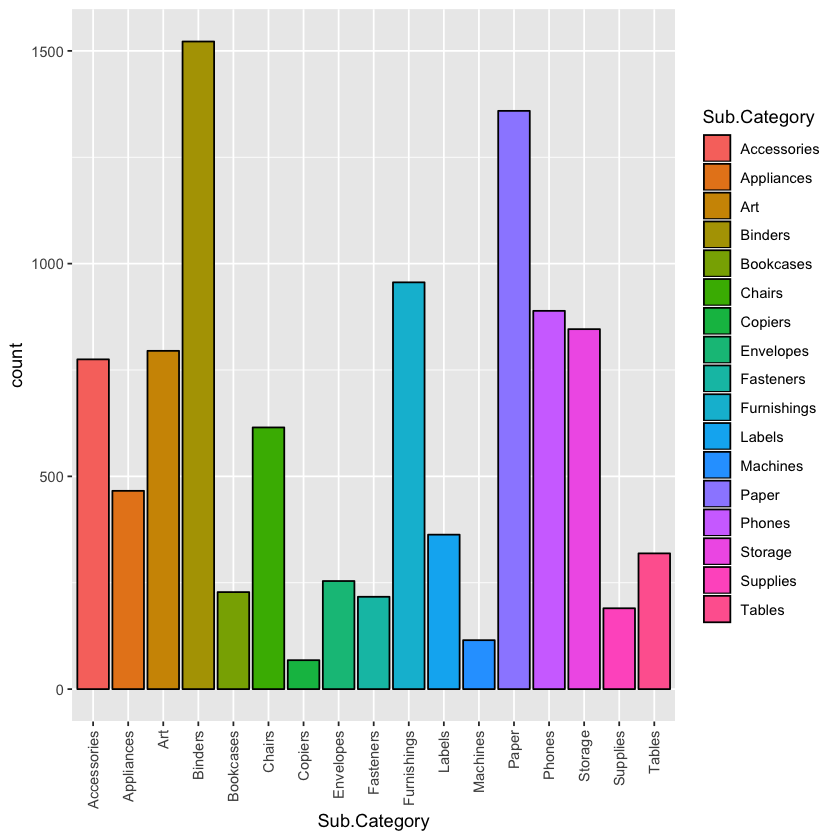

In [21]:
ggplot(data=data, aes(x=Sub.Category,fill=Sub.Category)) + geom_bar(colour="Black") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

### No of Orders with respect to State

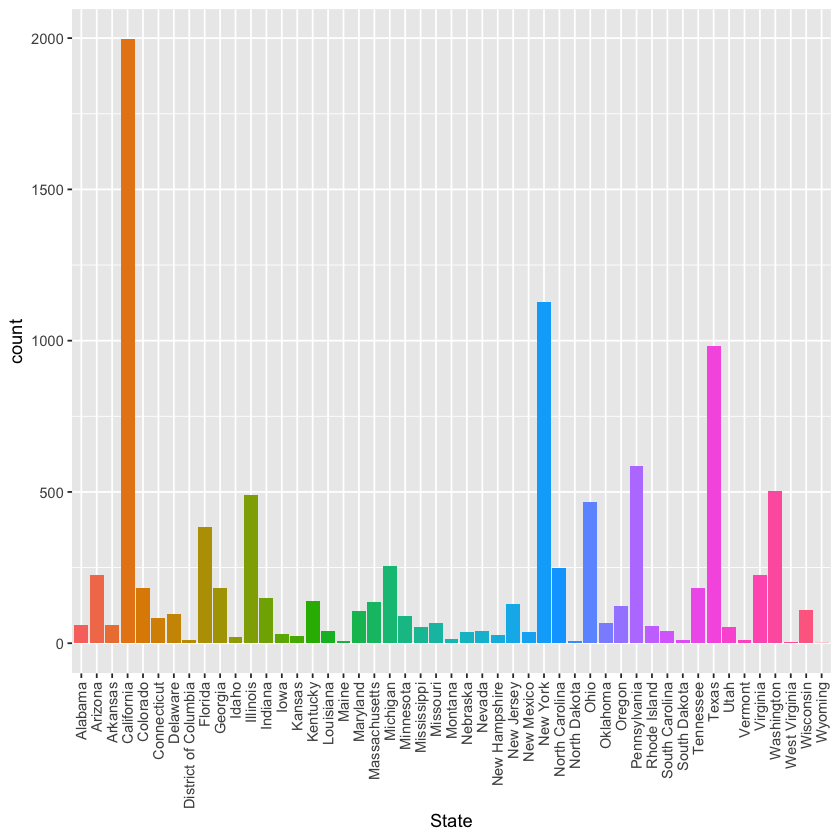

In [22]:
ggplot(data=data, aes(x=State,fill=State)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = "none") 


### Comparison of sale for different states

In [23]:
state_sales=aggregate(data$Sales, by=list(data$State), FUN=sum)
salesdata = state_sales[order(state_sales$x, decreasing = TRUE),]
salesdata

,Group.1,x
4,California,457576.271
31,New York,310827.151
42,Texas,170124.542
46,Washington,138560.810
37,Pennsylvania,116496.362
9,Florida,89473.708
12,Illinois,80162.537
34,Ohio,77976.764
21,Michigan,75879.644
45,Virginia,70636.720


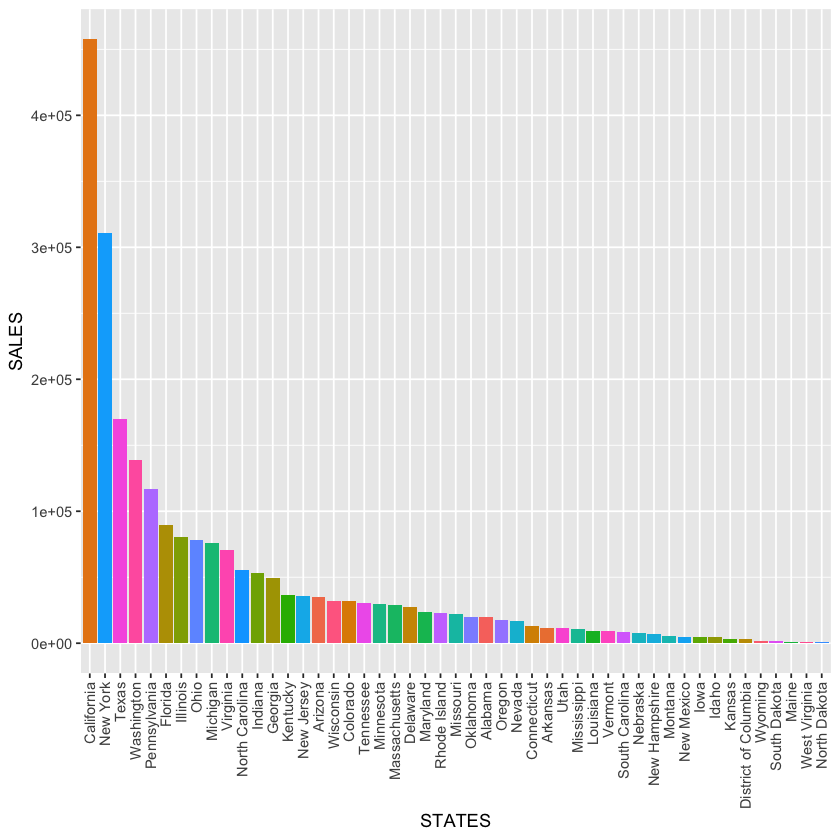

In [24]:
ggplot(salesdata,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = "none") + xlab("STATES") + ylab("SALES")

### Insight
California have highest sale and North Dakota have least sale.

## Comparison of profit in different states

In [25]:
#finding the weak states where we can work to make more profit.
state_profit=aggregate(data$Profit, by=list(data$State), FUN=sum)
profitdata = state_profit[order(state_profit$x, decreasing = TRUE),]
profitdata

,Group.1,x
4,California,76330.7891
31,New York,74015.4622
46,Washington,33368.2375
21,Michigan,24428.0903
45,Virginia,18597.9504
13,Indiana,18382.9363
10,Georgia,16250.0433
16,Kentucky,11199.6966
22,Minnesota,10823.1874
7,Delaware,9977.3748


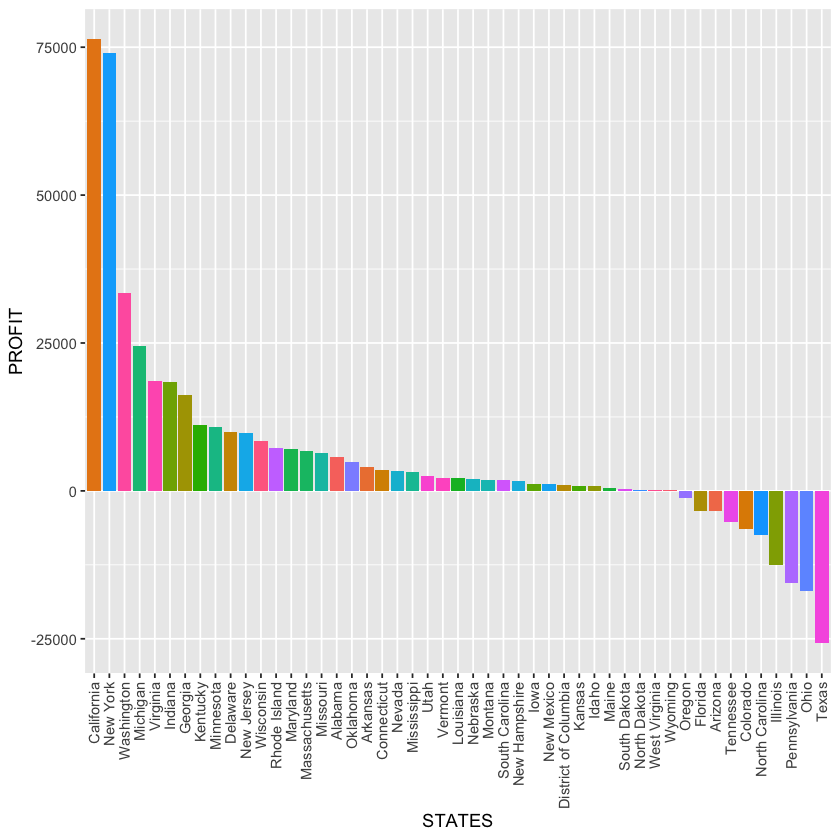

In [26]:
ggplot(profitdata,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = "none") + xlab("STATES") + ylab("PROFIT")

### Insight
States with low profit or loss are the weak areas where there is chance to make profit in future by giving extra focus. California have highest profit and Texas have highest loss.

### Comparison of sale in different City

In [27]:
city_sales=aggregate(data$Sales, by=list(data$City), FUN=sum)
salesdata = city_sales[order(city_sales$x, decreasing = TRUE),]
salesdata

,Group.1,x
330,New York City,256319.04
267,Los Angeles,175831.90
453,Seattle,119460.28
439,San Francisco,112577.17
375,Philadelphia,109061.46
208,Houston,64441.26
81,Chicago,48535.98
438,San Diego,47521.03
217,Jacksonville,44713.18
465,Springfield,43054.34


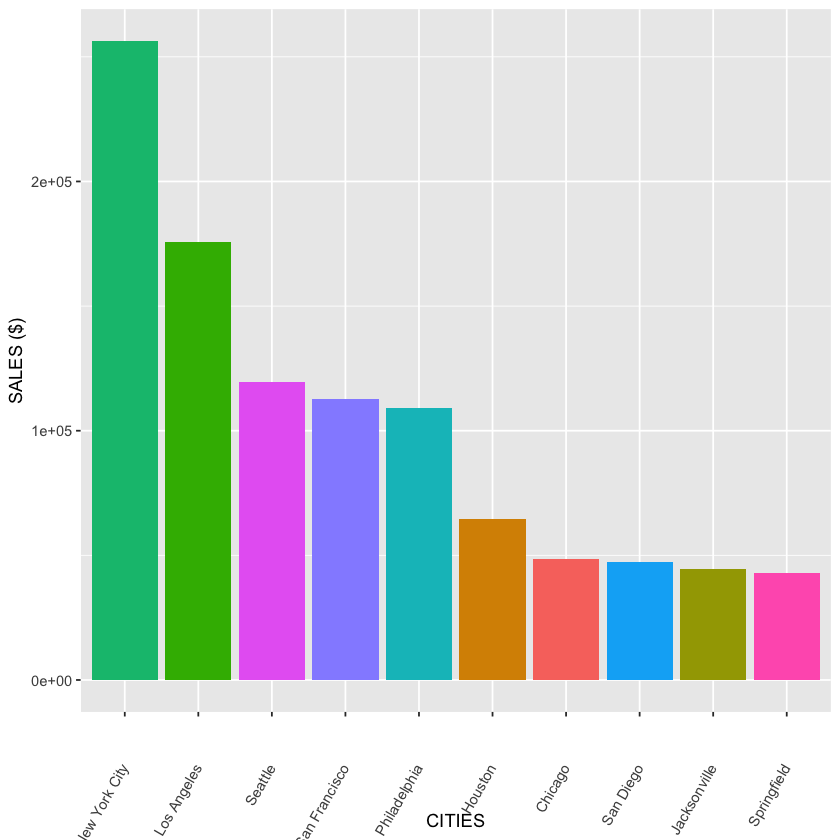

In [28]:
# Top10 Cities with highest sale
topcities = head(salesdata,10)
ggplot(topcities,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") + xlab("CITIES") + ylab("SALES ($)") +  theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1),legend.position = "none") 

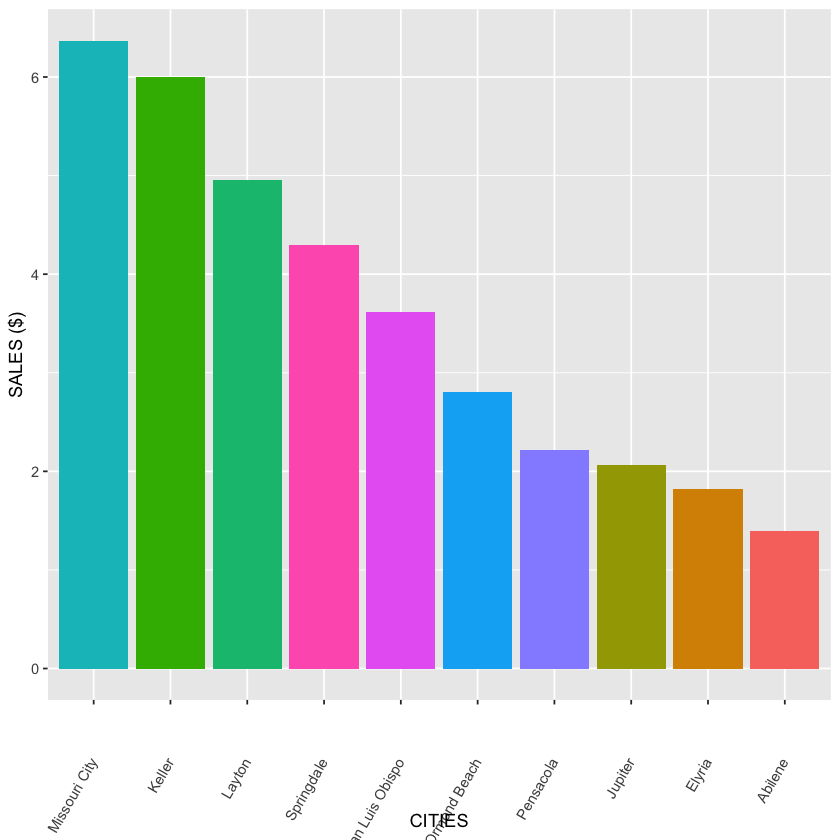

In [29]:
# Cities with least sales
bottomcities = tail(salesdata,10)
ggplot(bottomcities,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") +  theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1),legend.position = "none") + xlab("CITIES") + ylab("SALES ($)")

### Insight
New York City have highest sale and Abilene have lowest sale.

## Comparison of profit in different cities.

In [30]:
city_profit=aggregate(data$Profit, by=list(data$City), FUN=sum)
profitcitydata = city_profit[order(city_profit$x, decreasing = TRUE),]
profitcitydata

,Group.1,x
330,New York City,62013.897
267,Los Angeles,30431.427
453,Seattle,29121.682
439,San Francisco,17466.119
124,Detroit,13146.693
234,Lafayette,10018.388
216,Jackson,7581.683
22,Atlanta,6993.663
301,Minneapolis,6824.585
438,San Diego,6377.196


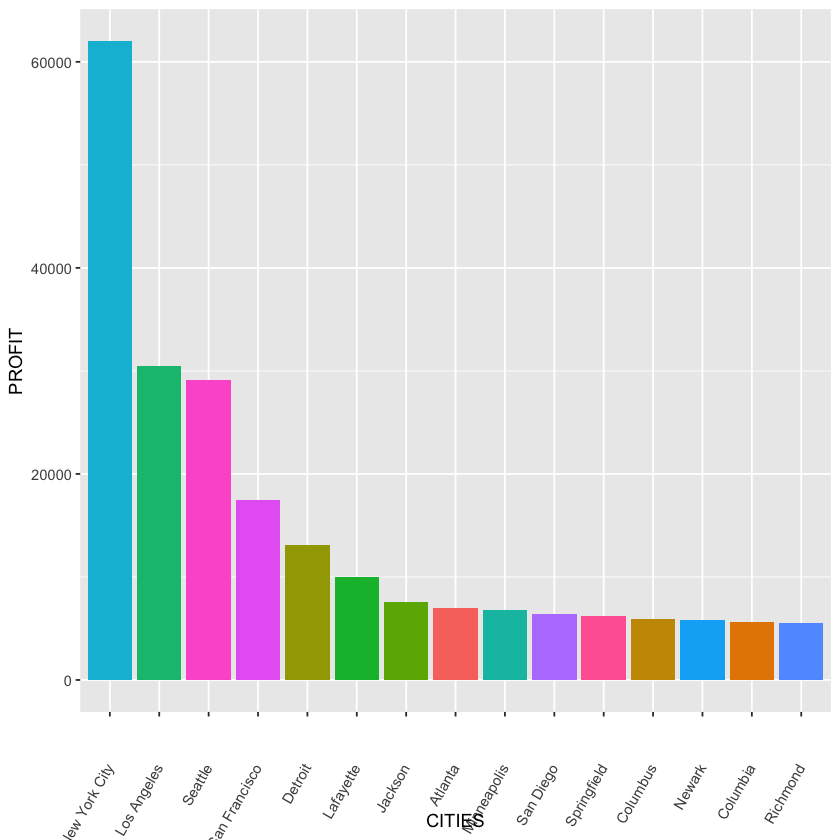

In [31]:
# Top Cities with highest profit
topcities = head(profitcitydata,15)
ggplot(topcities,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") + xlab("CITIES") + ylab("PROFIT") +  theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1),legend.position = "none") 

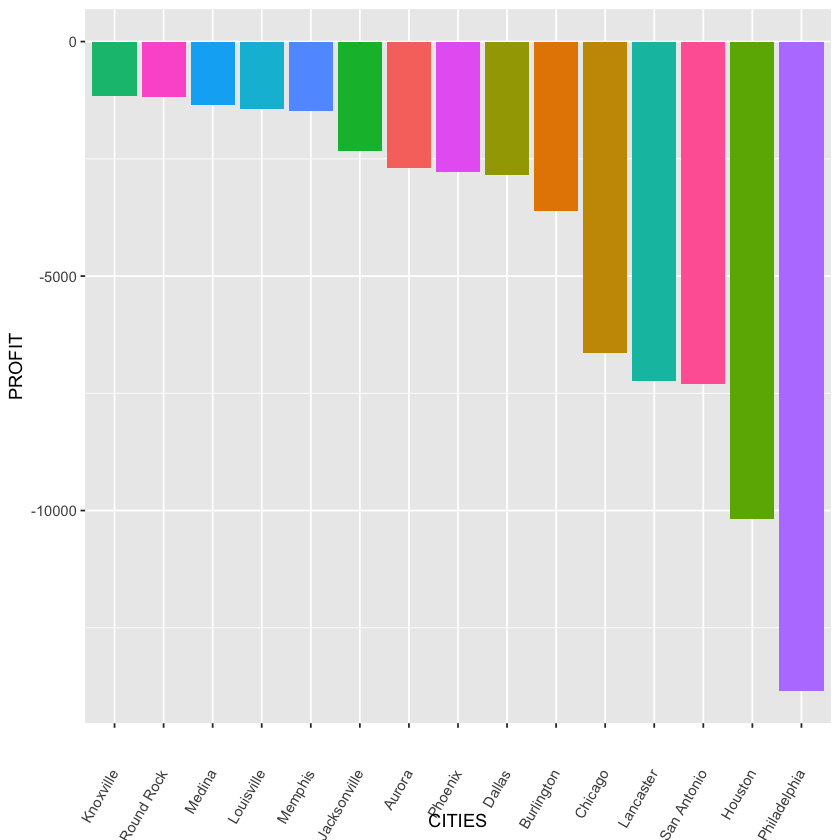

In [32]:
# Weak cities which are in high loss
bottomcities = tail(profitcitydata,15)
ggplot(bottomcities,aes(x=reorder(Group.1, -x),y=x,fill=Group.1)) + geom_bar(stat = "identity") + xlab("CITIES") + ylab("PROFIT") +  theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1),legend.position = "none") 

### Insight
New York City has the highest profit and Philadelphia have highest loss

## Sale vs Profit among different Category

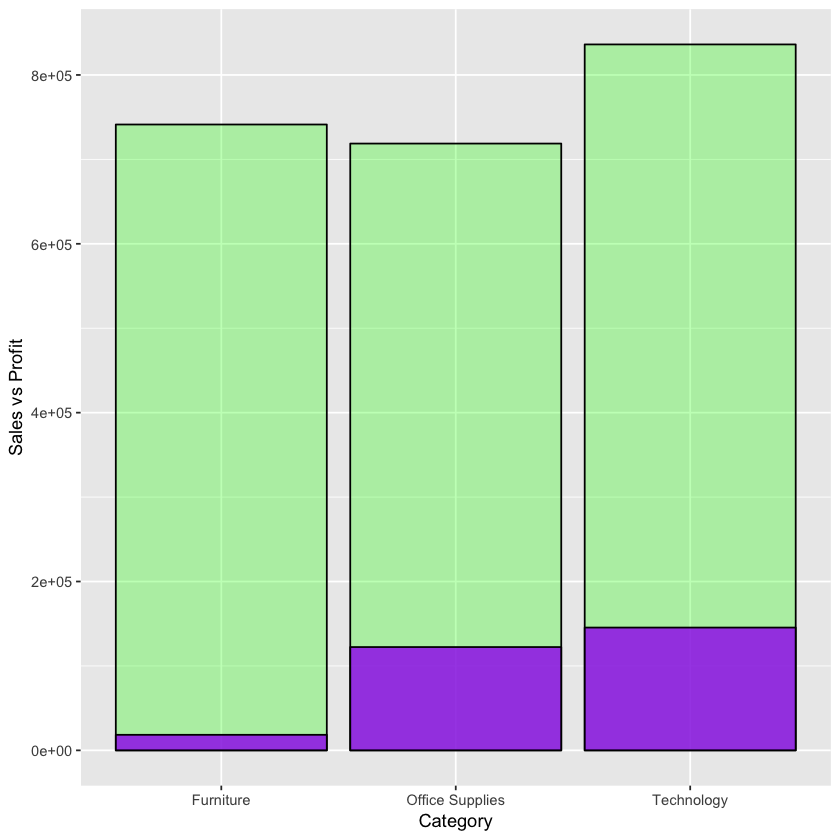

In [33]:
cat.sales=aggregate(data$Sales, by=list(data$Category), FUN=sum)
cat.profit = aggregate(data$Profit, by=list(data$Category), FUN=sum)
ggplot(cat.sales,aes(x=Group.1)) + geom_bar(aes(y=cat.sales$x), stat="identity", position ="identity", alpha=.3, fill='green', color='black') + geom_bar(aes(y=cat.profit$x), stat="identity", position="identity", alpha=.8, fill='purple', color='black') + xlab("Category")+ylab("Sales vs Profit")+ theme(legend.position = "none") 

Conclusion of the above plot is that there is low profit in Furniture subcategory.

## Sales vs Profit among Different sub Categories

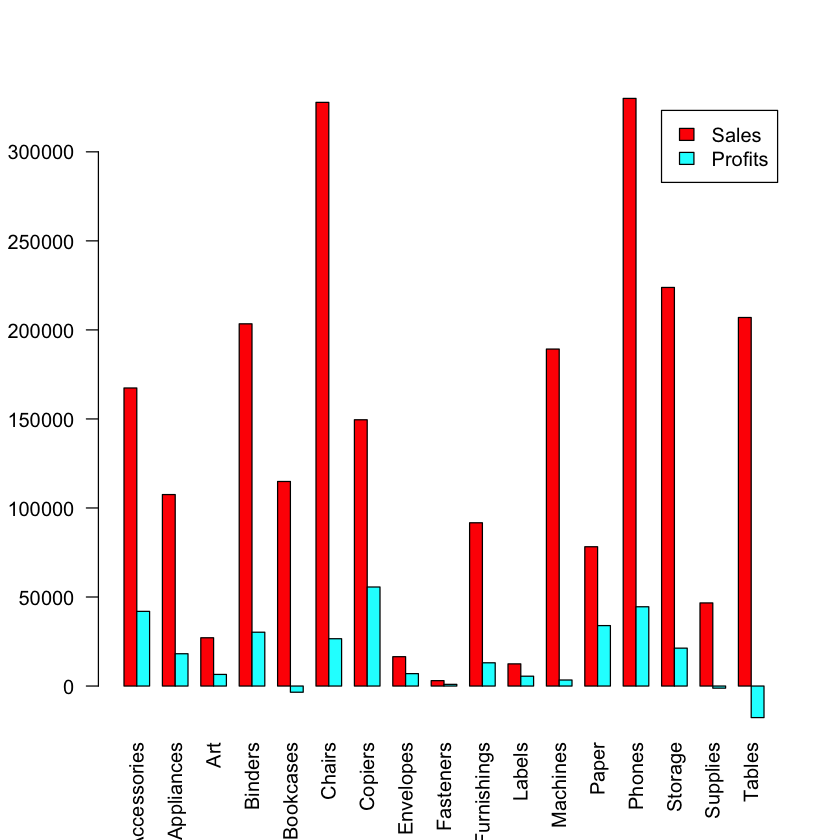

In [34]:
cat.sales=aggregate(data$Sales, by=list(data$Sub.Category), FUN=sum)
cat.profit = aggregate(data$Profit, by=list(data$Sub.Category), FUN=sum)
Sales = cat.sales$x
Profits = cat.profit$x
subs=rbind(Sales,Profits)
barplot(subs,beside=T,col = rainbow(2),names=cat.profit$Group.1, 
        legend=TRUE,las=2)

## WEAK AREAS TO IMPROVE
- No of Orders for Office Supplies is the most, but the Sales and Profit of Technology category is the highest. Thus attention must be given to office supplies to increase its profits.
 
- Texas has third highest number orders but it have lowest profits so we need to make sure that we make profits from this state. Arizona,Texas,Tennessee,,North Carolina,illinois,Florida,Colorado,Oregon,Ohio,Pennsylvania we need to pay more attention to these states so that no loss occurs in these states

- Cities like Medina, Louisville, Memphis, Jacksonville, Aurora, Phoenix, Dallas, Burlington, Chicago, Lancaster,   San Antonio, Houston, Philadelphia etc. are in huge loss, tactics to atleast make some profit should be applied. Sales in Philadelphia are pretty good but still it's in greatest loss. This is something to be cautious about and develop strategy.

- Papers have second highest orders but low profits. Phones have highest sales and pretty good profit too.Other sub-categories like enevlopes, fasteners etc need improvements in sales. Reason behind less profit or loss in items like Tables, BookCases, Machines although after good sale should be figured out.

- Sales and Profit are Moderately Correlated.

- Discount and Profit are Negatively Correlated.

-  More orders in the west region also average profit is higher in the west region. South region can be improved as orders and sales are less in that region. Also, profit in central region is least although we can see that sales is more.


## BUSINESS PROBLEMS THAT CAN BE SOLVED
- **FRAUD DETECTION**: As we have noticed that at some places sales are very high but profit is in negative i.e. actually it's a huge loss like in city of Philadelphia, this can be detected as fraud and there are other ways where data speaks for itself.

- **USER INTERESTS**: By exploring data, we can get an idea of user interest which can lead to profit making. It's important to know the probability that whether or not a user will buy your product. We can see this in sales vs Categories/ Sub-Categories section.

- **TRENDS**: With a little mix of ML, we can predict and know about trends in the market.

Hence, there are many more business problems that can be solved, I have listed just few of these. Therefore, data science is very essential for solving various business problems.
